# Facial Emotion Recognition Project using CNN

### Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Loading Datasets

In [5]:
# dataset filepaths
train_dataset_filepath = './FER-2013/train/'
test_dataset_filepath = './FER-2013/test/'

# image dimensions
img_dim = (48, 48)

# loading training dataset and spliting 25% of it to validation dataset
train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_filepath,
    seed=468,
    validation_split=0.25,
    color_mode='grayscale',
    image_size=img_dim,
    batch_size=32,    
    subset='both'
)

Found 28709 files belonging to 7 classes.
Using 21532 files for training.
Using 7177 files for validation.


In [6]:
# loading test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_filepath,
    seed=468,
    color_mode='grayscale',
    image_size=img_dim,
    batch_size=32,
)

Found 7178 files belonging to 7 classes.


In [7]:
classes = train_ds.class_names
print(classes)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Display 9 images from dataset

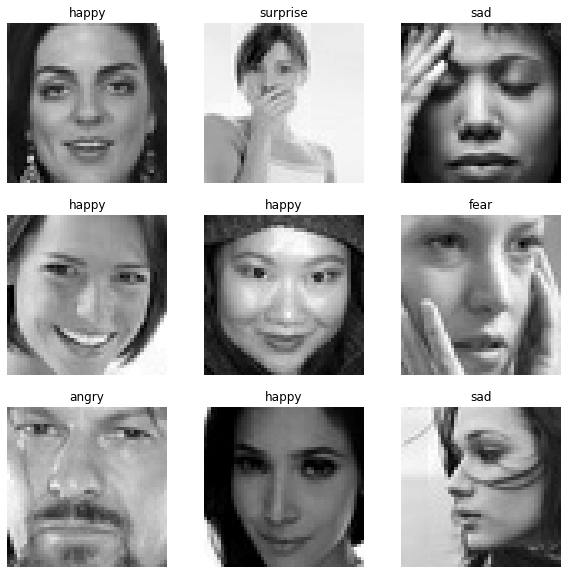

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.gray()
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")


### Define helper funtions

In [18]:
def train_model(model, epochs):
    return model.fit(x=train_ds, epochs=epochs, validation_data=val_ds, batch_size=32, verbose=1)

In [26]:
def plot_accuracy(history, epochs):
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs),
             history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(epochs),
             history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history.history['loss'], label='Training Loss')
    plt.plot(range(epochs),
             history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')

    plt.show()

In [20]:
### Build Model

In [21]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
# standardization
model.add(tf.keras.layers.Rescaling(1./255))
# first convolution layer
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# seconds convolution layer
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# third convolution layer
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())

# fully connected layer
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)       

In [24]:
epochs = 25
history = train_model(model, epochs)

Epoch 1/25
673/673 [==============================] - 19s 28ms/step - loss: 1.7594 - accuracy: 0.2735 - val_loss: 1.6986 - val_accuracy: 0.3156
Epoch 2/25
673/673 [==============================] - 18s 27ms/step - loss: 1.5586 - accuracy: 0.3972 - val_loss: 1.4885 - val_accuracy: 0.4364
Epoch 3/25
673/673 [==============================] - 18s 27ms/step - loss: 1.4336 - accuracy: 0.4494 - val_loss: 1.4456 - val_accuracy: 0.4562
Epoch 4/25
673/673 [==============================] - 18s 27ms/step - loss: 1.3566 - accuracy: 0.4843 - val_loss: 1.3620 - val_accuracy: 0.4868
Epoch 5/25
673/673 [==============================] - 18s 27ms/step - loss: 1.3004 - accuracy: 0.5061 - val_loss: 1.3522 - val_accuracy: 0.4945
Epoch 6/25
673/673 [==============================] - 18s 27ms/step - loss: 1.2594 - accuracy: 0.5217 - val_loss: 1.3407 - val_accuracy: 0.4928
Epoch 7/25
673/673 [==============================] - 18s 27ms/step - loss: 1.2214 - accuracy: 0.5346 - val_loss: 1.3156 - val_accuracy:

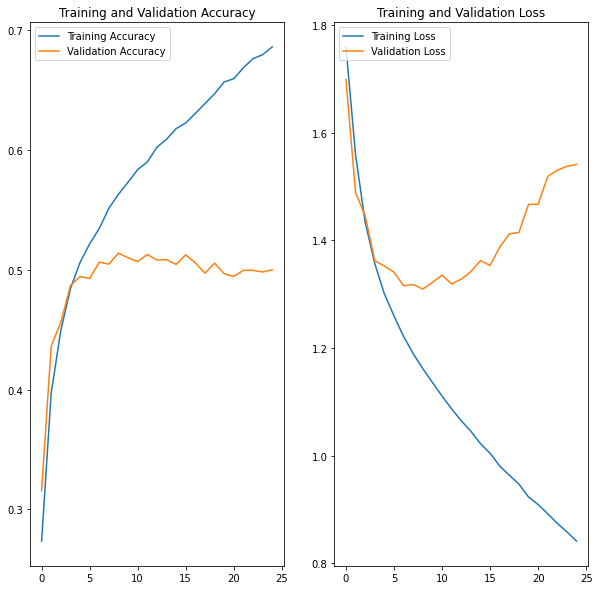

In [27]:
plot_accuracy(history, epochs)

Rebuilding Model with solutions for Overfitting

In [34]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
# standardization
model.add(tf.keras.layers.Rescaling(1./255))
# first convolution layer
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
# seconds convolution layer
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
# third convolution layer
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
# fully connected layer
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 64)       

In [37]:
epochs = 25
history = train_model(model, epochs)

Epoch 1/25
673/673 [==============================] - 31s 43ms/step - loss: 1.8374 - accuracy: 0.2811 - val_loss: 1.7179 - val_accuracy: 0.3291
Epoch 2/25
673/673 [==============================] - 29s 42ms/step - loss: 1.5744 - accuracy: 0.3877 - val_loss: 1.4597 - val_accuracy: 0.4418
Epoch 3/25
673/673 [==============================] - 28s 42ms/step - loss: 1.4724 - accuracy: 0.4329 - val_loss: 1.3931 - val_accuracy: 0.4683
Epoch 4/25
673/673 [==============================] - 28s 41ms/step - loss: 1.4261 - accuracy: 0.4544 - val_loss: 1.3346 - val_accuracy: 0.4956
Epoch 5/25
673/673 [==============================] - 28s 41ms/step - loss: 1.3797 - accuracy: 0.4754 - val_loss: 1.3367 - val_accuracy: 0.4870
Epoch 6/25
673/673 [==============================] - 28s 42ms/step - loss: 1.3549 - accuracy: 0.4811 - val_loss: 1.4357 - val_accuracy: 0.4605
Epoch 7/25
673/673 [==============================] - 30s 44ms/step - loss: 1.3398 - accuracy: 0.4962 - val_loss: 1.2528 - val_accuracy:

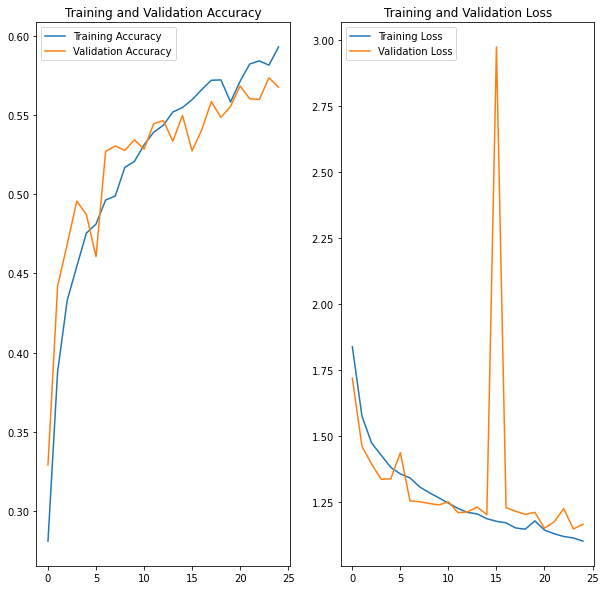

In [38]:
plot_accuracy(history, epochs)

In [39]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 128)      

In [41]:
epochs = 50
history = train_model(model, epochs)

Epoch 1/50
673/673 [==============================] - 70s 102ms/step - loss: 4.3048 - accuracy: 0.2301 - val_loss: 7.2015 - val_accuracy: 0.2541
Epoch 2/50
673/673 [==============================] - 68s 101ms/step - loss: 3.7813 - accuracy: 0.2743 - val_loss: 6.2532 - val_accuracy: 0.2594
Epoch 3/50
673/673 [==============================] - 67s 100ms/step - loss: 3.3711 - accuracy: 0.3077 - val_loss: 3.6074 - val_accuracy: 0.3103
Epoch 4/50
673/673 [==============================] - 68s 101ms/step - loss: 2.9975 - accuracy: 0.3460 - val_loss: 2.9920 - val_accuracy: 0.3412
Epoch 5/50
673/673 [==============================] - 70s 103ms/step - loss: 2.6869 - accuracy: 0.3693 - val_loss: 2.5460 - val_accuracy: 0.3840
Epoch 6/50
673/673 [==============================] - 70s 105ms/step - loss: 2.4419 - accuracy: 0.3919 - val_loss: 2.2754 - val_accuracy: 0.4204
Epoch 7/50
673/673 [==============================] - 70s 103ms/step - loss: 2.2370 - accuracy: 0.4064 - val_loss: 2.0907 - val_ac

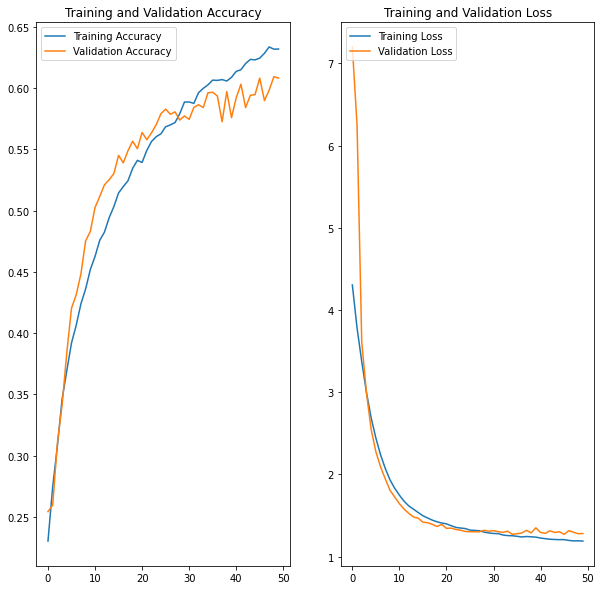

In [42]:
plot_accuracy(history, epochs)

### Evaluate Model with Test Dataset

In [43]:
model.evaluate(test_ds)

225/225 [==============================] - 5s 22ms/step - loss: 1.2882 - accuracy: 0.5979


[1.2882237434387207, 0.5979381203651428]

### Evaluate Performace

1/1 [==============================] - 0s 17ms/step

Predictions:
angry :  [17.454828]
disgust :  [70.73338]
fear :  [0.92191833]
happy :  [0.08966766]
neutral :  [9.186435]
sad :  [1.4317565]
surprise :  [0.18201981]

Original class: disgust
Predicted class: disgust


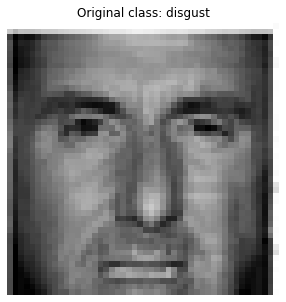

In [176]:
def predict_image(images, label):
    img_array = tf.expand_dims(images[i], 0)
    predictions = model.predict(img_array)
    print('\nPredictions:')
    
    for j, c in enumerate(classes):
        print(c , ": ",  predictions[0][[j]] * 100)
    
    prediction = classes[np.argmax(predictions)]
    print("\nOriginal class: " + label)
    print("Predicted class: " + prediction)

def predict_image_random():
    plt.figure(figsize=(5,5))

    for images, labels in test_ds.take(1):
        plt.gray()
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Original class: ' + classes[labels[i]])
        plt.axis("off")
        predict_image(images, classes[labels[i]])

predict_image_random()